In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv('diabetes.csv')

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


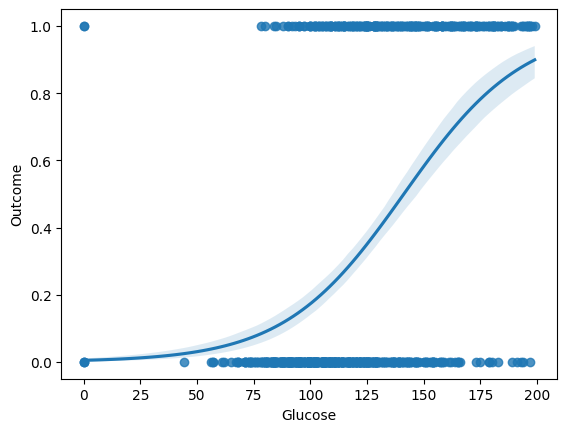

In [ ]:
sns.regplot(x='Glucose',y='Outcome',logistic=True,data=dataset)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
Train_data,Test_data = train_test_split(dataset,test_size = 0.15, random_state = 10)

In [ ]:
#importing statsmodel to help with other statistical values
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
formula=('Outcome~Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age')
model=logit(data=Train_data,formula=formula).fit()

Optimization terminated successfully.
         Current function value: 0.469484
         Iterations 6


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  652
Model:                          Logit   Df Residuals:                      643
Method:                           MLE   Df Model:                            8
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.2725
Time:                        02:32:31   Log-Likelihood:                -306.10
converged:                       True   LL-Null:                       -420.76
Covariance Type:            nonrobust   LLR p-value:                 4.151e-45
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.2141      0.758    -10.831      0.000      -9.701      -6.728
Pregnancies                  0.0964      0.034      2.801      0.005       0.029       0.164
Glucose                      0.0371      0.004      9.089      0.000       0.029       0.045
BloodPressure               -0.0132      0.005     -2.421      0.015      -0.024      -0.003
SkinThickness                0.0059      0.008      0.766      0.444      -0.009       0.021
Insulin                     -0.0015      0.001     -1.648      0.099      -0.003       0.000
BMI                          0.0725      0.016      4.481      0.000       0.041       0.104
DiabetesPedigreeFunction     0.8251      0.331      2.495      0.013       0.177       1.473
Age                          0.0203      0.010      2.012      0.044       0.001       0.040
============================================================================================
"""

In [ ]:
print(np.exp(model.params))

Intercept                   0.000271
Pregnancies                 1.101202
Glucose                     1.037838
BloodPressure               0.986914
SkinThickness               1.005933
Insulin                     0.998456
BMI                         1.075212
DiabetesPedigreeFunction    2.282067
Age                         1.020546
dtype: float64


In [ ]:
#importing statsmodel to help with other statistical values
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
formula=('Outcome~Pregnancies+Glucose+BMI+DiabetesPedigreeFunction+BloodPressure')
model1=logit(data=Train_data,formula=formula).fit()

Optimization terminated successfully.
         Current function value: 0.475007
         Iterations 6


In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  652
Model:                          Logit   Df Residuals:                      646
Method:                           MLE   Df Model:                            5
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.2639
Time:                        02:32:38   Log-Likelihood:                -309.70
converged:                       True   LL-Null:                       -420.76
Covariance Type:            nonrobust   LLR p-value:                 5.263e-46
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -7.6551      0.709    -10.795      0.000      -9.045      -6.265
Pregnancies                  0.1357      0.030      4.528      0.000       0.077       0.194
Glucose                      0.0363      0.004      9.794      0.000       0.029       0.044
BMI                          0.0704      0.015      4.703      0.000       0.041       0.100
DiabetesPedigreeFunction     0.8053      0.326      2.470      0.014       0.166       1.444
BloodPressure               -0.0109      0.005     -2.099      0.036      -0.021      -0.001
============================================================================================
"""

In [ ]:
print(np.exp(model.params))

Intercept                   0.000271
Pregnancies                 1.101202
Glucose                     1.037838
BloodPressure               0.986914
SkinThickness               1.005933
Insulin                     0.998456
BMI                         1.075212
DiabetesPedigreeFunction    2.282067
Age                         1.020546
dtype: float64


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
# Compute prediction
prediction = model1.predict(exog = Test_data)
# Define the cutoff 
cutoff = 0.4
# Compute class predictions: y_prediction
y_prediction = np.where(prediction > cutoff, 1, 0)
# Assign actual class Labels from the test sample to y_actual 
y_actual=Test_data["Outcome"]
# Compute and print confusion matrix using crosstab function 
conf_matrix = pd.crosstab(y_actual, y_prediction,
rownames = ["Actual"],
colnames = ["Predicted"], margins=True)
# Print the confusion matrix
print(conf_matrix)

Predicted   0   1  All
Actual                
0          64  10   74
1          14  28   42
All        78  38  116


In [ ]:
accuracy=accuracy_score(y_actual,y_prediction)
print(accuracy)

0.7931034482758621
